In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid  # More stable sigmoid function
from keras.datasets import cifar10


In [16]:
# Load the MNIST dataset
(train_data_all, train_labels_all), (test_data_all, test_labels_all) = cifar10.load_data()

# Here, train_images and test_images are the images for the training and test sets,
# and train_labels and test_labels are the corresponding labels for the images.

# Printing the shape of the datasets to understand what they contain
print(f"Training images shape: {train_data_all.shape}")  # 60,000 images of 28x28 pixels
print(f"Training labels shape: {train_labels_all.shape}")  # 60,000 labels
print(f"Test images shape: {test_data_all.shape}")       # 10,000 images of 28x28 pixels
print(f"Test labels shape: {test_labels_all.shape}")       # 10,000 labels

# Optionally, normalize the images to have pixel values between 0 and 1
train_data_raw = train_data_all / 255.0
test_data_raw = test_data_all / 255.0


# Assuming mnist is a dictionary containing your loaded data
num_train_samples_all =train_data_all.shape[0]
num_test_samples_all = test_data_all.shape[0]
image_width = train_data_all.shape[1]
image_heigth = train_data_all.shape[2]
image_channels = train_data_all.shape[3]
feature_size = image_width * image_heigth * image_channels

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [17]:
train_data_all = train_data_all.reshape((num_train_samples_all, feature_size))
test_data_all = test_data_all.reshape((num_test_samples_all, feature_size))

# Optionally, you can normalize the pixel values to be between 0 and 1
train_data_all = train_data_all.astype('float32') / 255
test_data_all = test_data_all.astype('float32') / 255

In [18]:

class_labels = [3, 9]  # Pairs of classes to classify

train_data = []
train_labels = []
test_data = []
test_labels = []

# Changing labels to 0 and 1
# Extract images and labels for the current class pair
for label in class_labels:
    indices = np.where(train_labels_all == label)[0]
    filtered_data = train_data_all[indices]
    labels = np.ones(len(indices)) * label

    train_data.append(filtered_data)
    train_labels.append(labels)

    indices = np.where(test_labels_all == label)[0]
    filtered_data = test_data_all[indices]
    labels = np.ones(len(indices)) * label

    test_data.append(filtered_data)
    test_labels.append(labels)

In [19]:
train_data = np.concatenate(train_data)
train_labels = np.concatenate(train_labels)
test_data = np.concatenate(test_data)
test_labels = np.concatenate(test_labels)

In [20]:
# Map class labels to 0 and 1
train_labels = np.where(train_labels == class_labels[0], 0, 1)
test_labels = np.where(test_labels == class_labels[0], 0, 1)

In [21]:
# Shuffle train data
np.random.seed(42)
shuffled_indices = np.random.permutation(len(train_labels))
train_data = train_data[shuffled_indices]
train_labels = train_labels[shuffled_indices]

# Shuffle test data
np.random.seed(42)
shuffled_indices = np.random.permutation(len(test_labels))
test_data = test_data[shuffled_indices]
test_labels = test_labels[shuffled_indices]


In [22]:
# Add bias term
train_data = np.hstack([train_data, np.ones((len(train_data), 1))])
test_data = np.hstack([test_data, np.ones((len(test_data), 1))])


In [23]:

num_iterations = 500
alpha = 0.05  # learning rate

# Initialize the weights for logistic regression
theta = np.random.randn(train_data.shape[1], 1)

losses = []  # To store the loss at each iteration


for k in range(num_iterations):
    predictions = sigmoid(np.dot(train_data, theta))
    predictions = np.clip(predictions, 1e-5, 1 - 1e-5)

    gradient = np.dot(train_data.T, (predictions - train_labels[:, np.newaxis])) / len(train_labels)
    theta -= alpha * gradient

    # Compute the logistic loss
    loss = -np.mean(train_labels[:, np.newaxis] * np.log(predictions) + (1 - train_labels[:, np.newaxis]) * np.log(1 - predictions))
    losses.append(loss)

# Calculate accuracy on training and test sets
train_predictions = sigmoid(np.dot(train_data, theta)) >= 0.5
test_predictions = sigmoid(np.dot(test_data, theta)) >= 0.5

train_accuracy = np.mean(train_predictions.flatten() == train_labels)
test_accuracy = np.mean(test_predictions.flatten() == test_labels)

print(f'(Class {class_labels[0]} vs Class {class_labels[1]}):')
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Min of loss function: {np.min(losses):.4f}')



(Class 3 vs Class 9):
Training Accuracy: 75.99%
Test Accuracy: 74.60%
Min of loss function: 1.1524


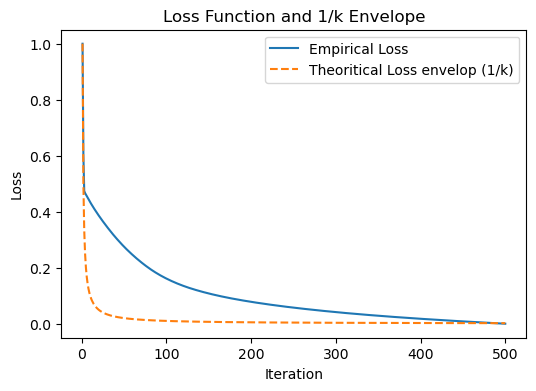

In [24]:
# Assuming `losses` is a list or array of your loss values from the training loop
losses = np.array(losses)  # Ensure losses is a NumPy array for easy manipulation

# Scale the losses to start from 1
scaled_losses = (losses - losses.min()) / (losses.max() - losses.min())
scaled_losses = scaled_losses  # Invert so it starts from 1 and goes towards 0

# Generate the 1/k envelope
iterations = np.arange(1, len(losses) + 1)
envelope = 1 / iterations

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(iterations, scaled_losses, label='Empirical Loss')
plt.plot(iterations, envelope, label='Theoritical Loss envelop (1/k)', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function and 1/k Envelope')
plt.legend()
plt.show()

1


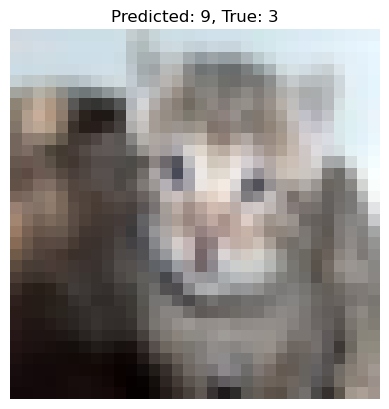

In [39]:
# Randomly select an image
rng = np.random.default_rng()
rand_index = rng.integers(0, len(test_data))
selected_image = test_data[rand_index, :]  # Exclude the bias term

sample_test_prediction = int(sigmoid(np.dot(selected_image, theta)) >= 0.5)
predicted_label = class_labels[sample_test_prediction]


true_label = class_labels[int(test_labels[rand_index])]
reshaped_image = selected_image[: -1].reshape(image_width, image_heigth, image_channels)


print(rand_index)
# Plotting the image
plt.imshow(reshaped_image)
plt.axis('off')  # Remove axes for better visualization
plt.title(f'Predicted: {predicted_label}, True: {true_label}')
plt.show()

In [26]:
from LogiticRegressionGD_mp import LogisticRegressionDG_mp

# Instantiate the LogisticRegressionModel
model = LogisticRegressionDG_mp(learning_rate=0.08, num_iterations=500)

# Fit the model to your training data
model.fit(train_data, train_labels, test_data, test_labels)

# Get training and testing accuracy
train_accuracy = model.get_train_accuracy()
test_accuracy = model.get_test_accuracy()

# Optionally, print out the accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Get loss values over iterations
losses = model.get_losses()

# Predict a new sample (make sure to replace `sample_data` with actual data)
# sample_data should be a numpy array of shape (number_of_features,)
# sample_prediction = model.predict(sample_data)

# Get the model parameters (theta) with and without bias
theta_with_bias = model.get_model()
theta_without_bias = model.get_model_without_bias()

# Optionally, print or use the theta values and losses as needed

Training Accuracy: 0.7623
Testing Accuracy: 0.76
